In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [2]:
mat = loadmat("data/cs.mat")
mat['img'].shape

(50, 50)

In [3]:
cs = mat['img']

cs.shape

(50, 50)

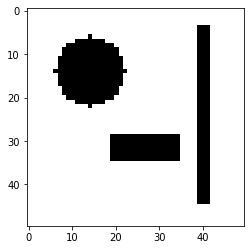

In [48]:
plt.imshow(cs, cmap='Greys')
plt.savefig("img/cs.png")

In [5]:
n = 1300
p = 2500

In [6]:
A = np.random.normal(0, 1, (1300, 2500))
print(A.shape)
eps = np.random.normal(0, 5, (1300, 1))
print(eps.shape)


(1300, 2500)
(1300, 1)


In [7]:
print(A.shape)
print(cs.flatten().shape)
print(eps.shape)
print((A @ cs.flatten()).shape)
(( A @ cs.reshape((2500, 1)) ) + eps).shape

(1300, 2500)
(2500,)
(1300, 1)
(1300,)


(1300, 1)

In [8]:
y = (( A @ cs.reshape((2500, 1)) ) + eps)

In [9]:
( A @ cs.reshape((2500, 1)) ).shape

(1300, 1)

In [10]:
from sklearn.linear_model import LassoCV

In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

mse = {}
for i in np.linspace(0.01, 0.99, 99):
    lasso = Lasso(alpha=i, max_iter=5000)
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=3)
    scores = cross_val_score(lasso, A, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    
    mse[i] = scores.mean()

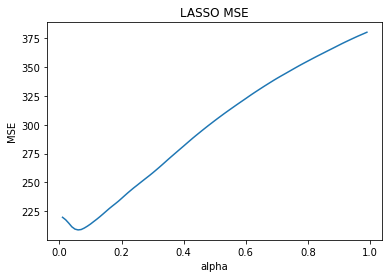

In [12]:
plt.plot(mse.keys(), ([np.abs(x) for x in mse.values()]))
plt.title("LASSO MSE")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.savefig("img/mse_lasso_pt3.png")

In [49]:
alphas = [np.abs(x) for x in mse.values()]
a = np.argsort(alphas)
alpha = list(mse.keys())[a[0]]
alpha

0.060000000000000005

In [14]:
lasso = Lasso(alpha=alpha, max_iter=2000).fit(A, y)
lasso.coef_.shape

(2500,)

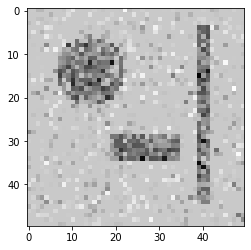

In [42]:
plt.imshow(lasso.coef_.reshape((50, 50)), cmap="Greys")
plt.savefig("img/lasso_plot.png")

In [43]:
from sklearn.linear_model import Ridge

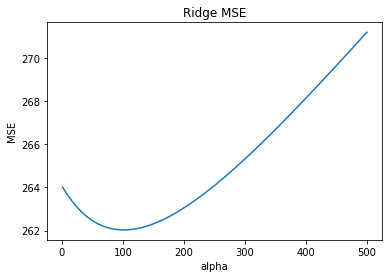

In [44]:
mse_ridge = {}
for i in np.linspace(1, 500, 250):
    ridge = Ridge(alpha=i, max_iter=5000)
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=3)
    scores = cross_val_score(ridge, A, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    
    mse_ridge[i] = scores.mean()
    
plt.plot(mse_ridge.keys(), [np.abs(x) for x in mse_ridge.values()])
plt.title("Ridge MSE")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.savefig("img/mse_ridge_pt3.png")

In [45]:
alphas_r = [np.abs(x) for x in mse_ridge.values()]
a_r = np.argsort(alphas_r)
alpha_r = list(mse_ridge.keys())[a_r[0]]
alpha_r

101.20080321285141

In [46]:
ridge = Ridge(alpha=round(alpha_r), max_iter=2000).fit(A, y)
ridge.coef_.shape

(1, 2500)

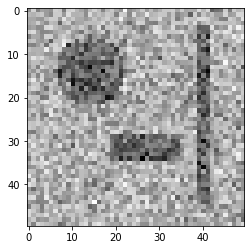

In [47]:
plt.imshow(ridge.coef_.reshape((50, 50)), cmap='Greys')
plt.savefig("img/ridge_plot.png")